# 給与推定コンペ

## ライブラリのインポート

In [20]:
import numpy as np
import pandas as pd
import japanize_matplotlib

## データの読み込み

In [3]:
train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_data.csv')

<div align="center">
    <img src="img/column_description.png">
</div>

In [4]:
train.shape, test.shape

((21000, 13), (9000, 12))

In [5]:
train.head()

,id,position,age,area,sex,partner,num_child,education,service_length,study_time,commute,overtime,salary
0,0,1,44,愛知県,2,1,2,1,24,2.0,1.6,9.2,428.074887
1,1,2,31,奈良県,1,0,0,0,13,9.0,0.7,12.4,317.930517
2,2,2,36,山口県,1,0,0,2,14,4.0,0.4,16.9,357.350316
3,3,0,22,東京都,2,0,0,0,4,3.0,0.4,6.1,201.310911
4,4,0,25,鹿児島県,2,0,0,1,5,3.0,0.2,4.9,178.067475


In [6]:
test.head()

,id,position,age,area,sex,partner,num_child,education,service_length,study_time,commute,overtime
0,0,3,39,鹿児島県,2,1,5,1,19,1.0,1.8,14.2
1,1,1,31,宮城県,1,0,0,4,0,0.0,0.5,18.6
2,2,0,20,愛知県,2,1,2,0,2,2.0,1.2,2.3
3,3,0,28,三重県,2,0,0,0,10,3.0,0.3,0.0
4,4,1,41,愛媛県,2,0,0,0,23,3.0,0.5,10.1


## 基礎分析
- 訓練データ、テストデータともに、欠損値はない
- 訓練データ、テストデータを比較すると、overtime（残業時間）の平均値が訓練データの方が少し高い

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 13 columns):
id                21000 non-null int64
position          21000 non-null int64
age               21000 non-null int64
area              21000 non-null object
sex               21000 non-null int64
partner           21000 non-null int64
num_child         21000 non-null int64
education         21000 non-null int64
service_length    21000 non-null int64
study_time        21000 non-null float64
commute           21000 non-null float64
overtime          21000 non-null float64
salary            21000 non-null float64
dtypes: float64(4), int64(8), object(1)
memory usage: 2.1+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 12 columns):
id                9000 non-null int64
position          9000 non-null int64
age               9000 non-null int64
area              9000 non-null object
sex               9000 non-null int64
partner           9000 non-null int64
num_child         9000 non-null int64
education         9000 non-null int64
service_length    9000 non-null int64
study_time        9000 non-null float64
commute           9000 non-null float64
overtime          9000 non-null float64
dtypes: float64(3), int64(8), object(1)
memory usage: 843.9+ KB


In [10]:
train.describe()

,id,position,age,sex,partner,num_child,education,service_length,study_time,commute,overtime,salary
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,10499.500000,1.226857,33.132476,1.498333,0.499333,0.999667,1.098571,12.303143,3.828476,1.059910,12.126752,361.170391
std,6062.322162,1.224682,10.715241,0.500009,0.500011,1.417459,1.116355,10.696823,3.312927,0.665307,5.509408,171.618501
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,110.622310
25%,5249.750000,0.000000,24.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.500000,8.300000,225.498117
50%,10499.500000,1.000000,30.000000,1.000000,0.000000,0.000000,1.000000,9.000000,3.000000,1.100000,12.100000,315.224583
75%,15749.250000,2.000000,42.000000,2.000000,1.000000,2.000000,2.000000,21.000000,6.000000,1.500000,15.800000,456.927443
max,20999.000000,4.000000,67.000000,2.000000,1.000000,9.000000,4.000000,49.000000,24.000000,4.800000,31.900000,1098.943632


In [11]:
test.describe()

,id,position,age,sex,partner,num_child,education,service_length,study_time,commute,overtime
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4499.500000,1.188000,32.937778,1.488889,0.503667,1.001222,1.089444,12.141333,3.646333,1.051700,7.301389
std,2598.220545,1.208091,10.704380,0.499904,0.500014,1.405820,1.112866,10.698280,3.290426,0.656505,6.002899
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,2249.750000,0.000000,24.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.500000,2.000000
50%,4499.500000,1.000000,29.000000,1.000000,1.000000,0.000000,1.000000,8.000000,3.000000,1.100000,6.500000
75%,6749.250000,2.000000,42.000000,2.000000,1.000000,2.000000,2.000000,21.000000,6.000000,1.500000,11.500000
max,8999.000000,4.000000,65.000000,2.000000,1.000000,8.000000,4.000000,47.000000,21.000000,4.800000,29.500000


### position

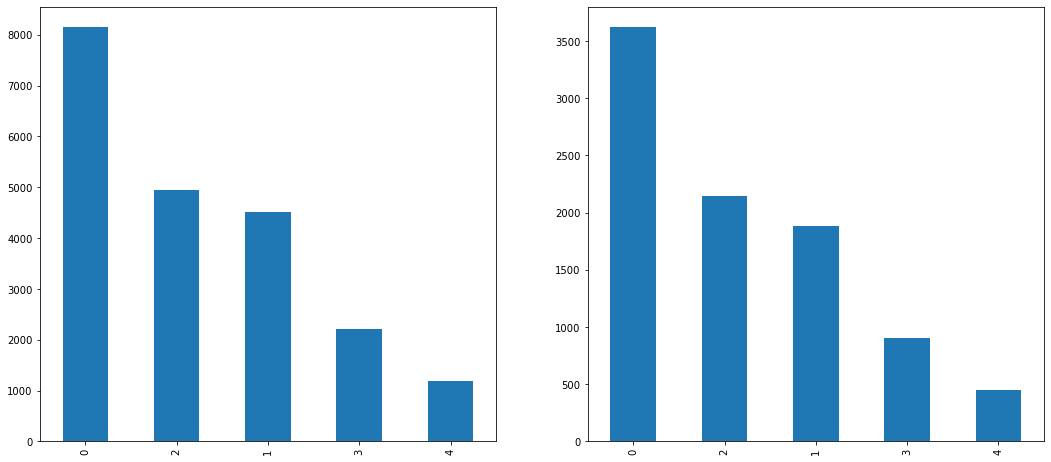

In [16]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
train['position'].value_counts().plot.bar()

plt.subplot(1, 2, 2)
test['position'].value_counts().plot.bar()
 
plt.show();

### age

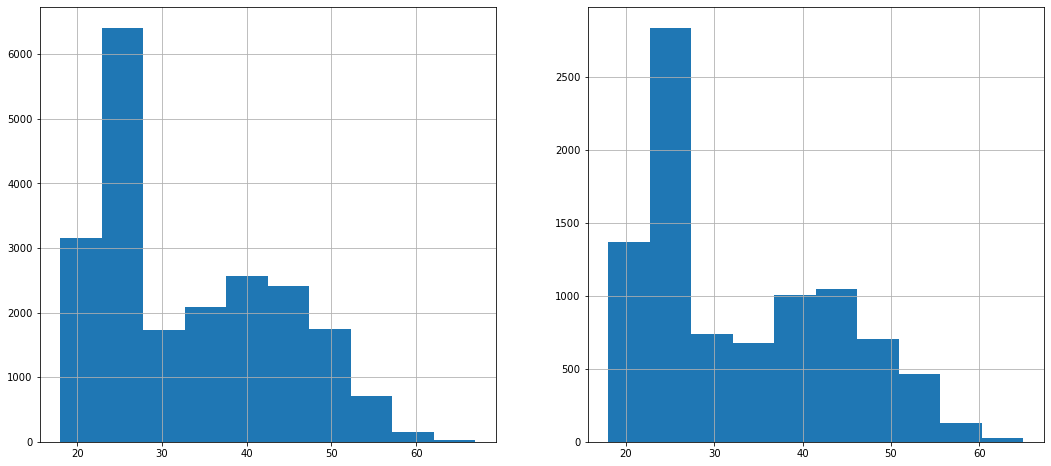

In [17]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
train['age'].hist()

plt.subplot(1, 2, 2)
test['age'].hist()

plt.show();

### area

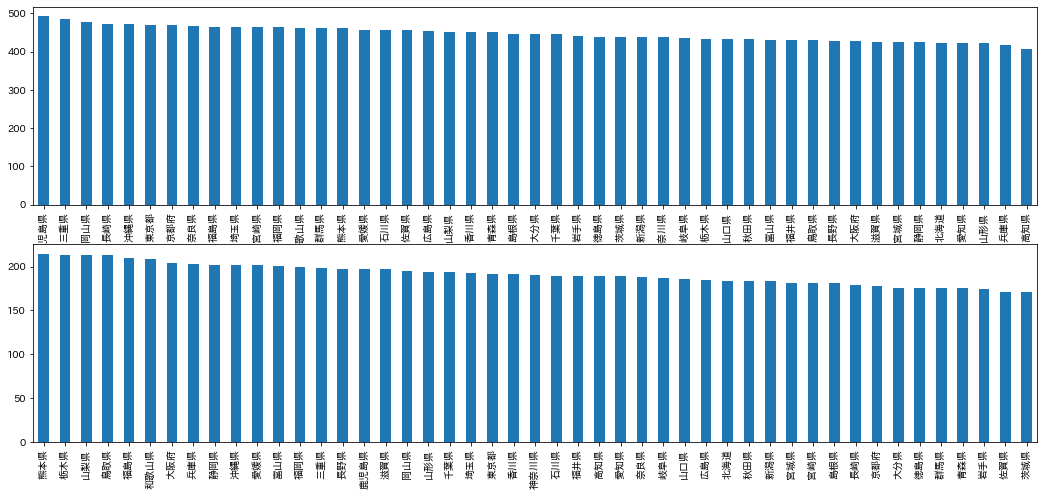

In [21]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 1, 1)
train['area'].value_counts().plot.bar()

plt.subplot(2, 1, 2)
test['area'].value_counts().plot.bar()

plt.show();

### sex

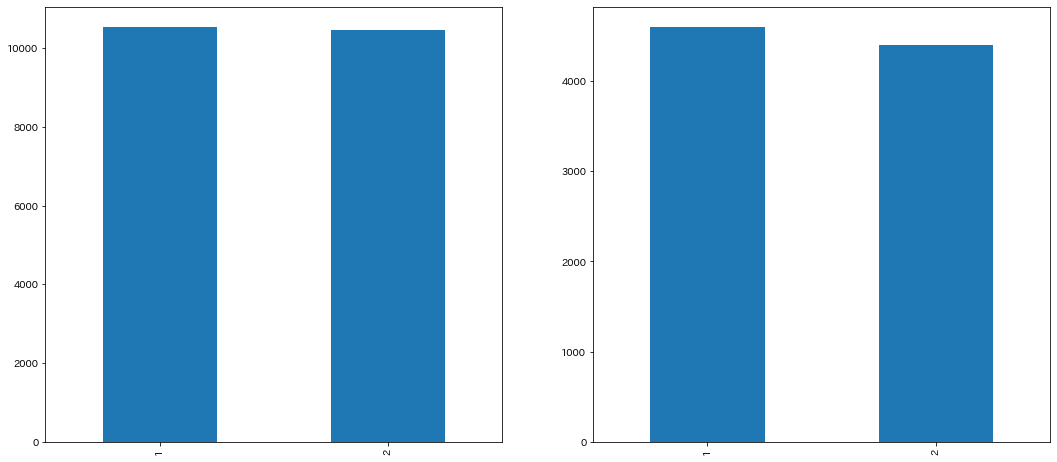

In [22]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
train['sex'].value_counts().plot.bar()

plt.subplot(1, 2, 2)
test['sex'].value_counts().plot.bar()

plt.show();

### partner

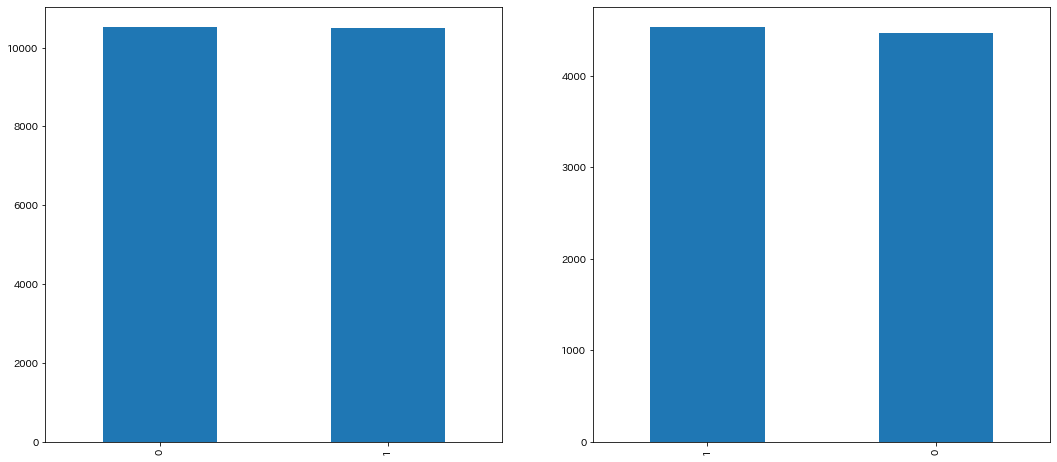

In [23]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
train['partner'].value_counts().plot.bar()

plt.subplot(1, 2, 2)
test['partner'].value_counts().plot.bar()

plt.show();

### num_child

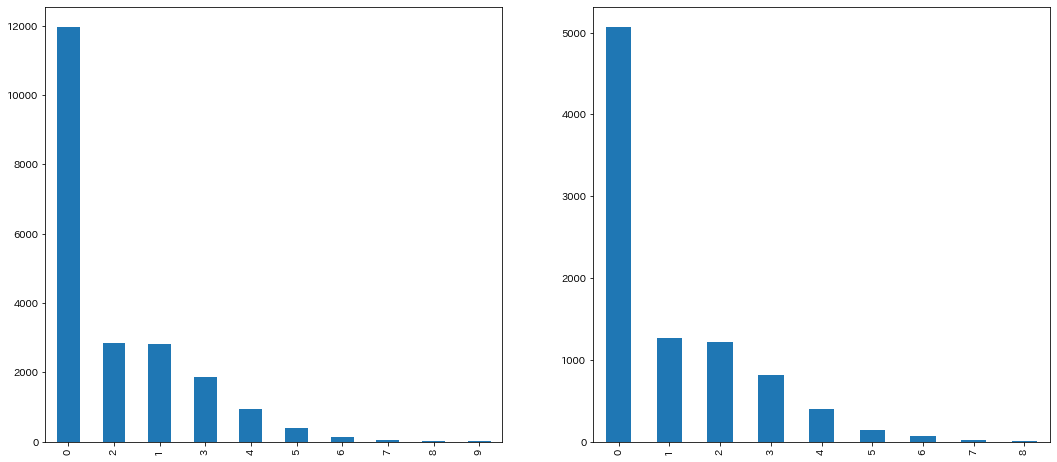

In [24]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
train['num_child'].value_counts().plot.bar()

plt.subplot(1, 2, 2)
test['num_child'].value_counts().plot.bar()

plt.show();

### education

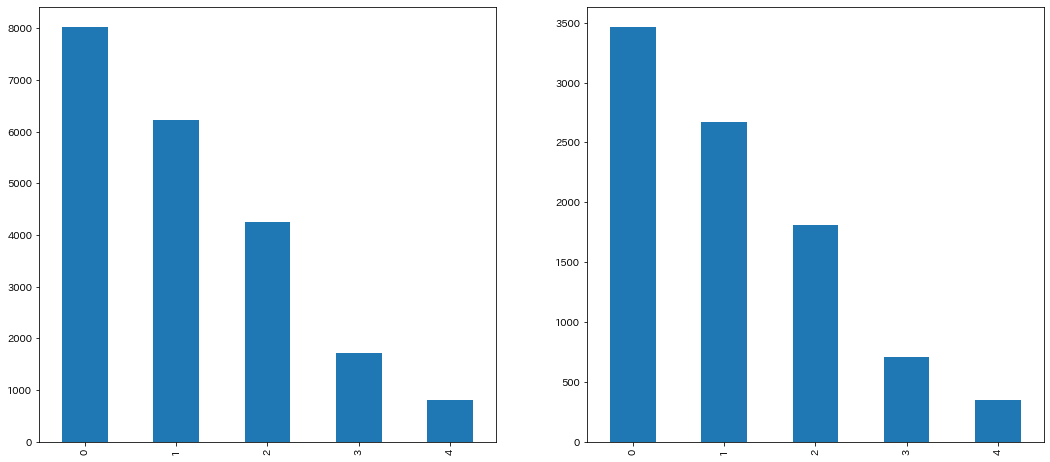

In [25]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
train['education'].value_counts().plot.bar()

plt.subplot(1, 2, 2)
test['education'].value_counts().plot.bar()

plt.show();

### service_length

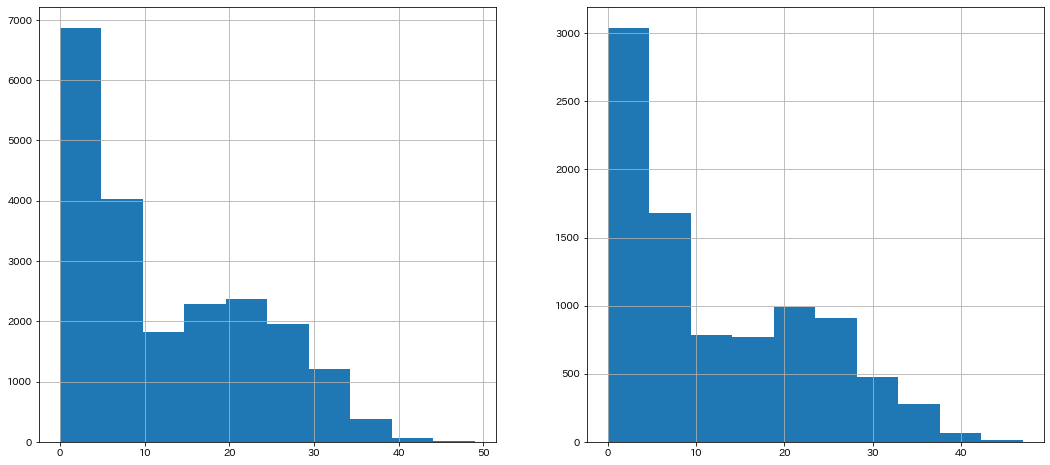

In [26]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
train['service_length'].hist()

plt.subplot(1, 2, 2)
test['service_length'].hist()

plt.show();

### study_time

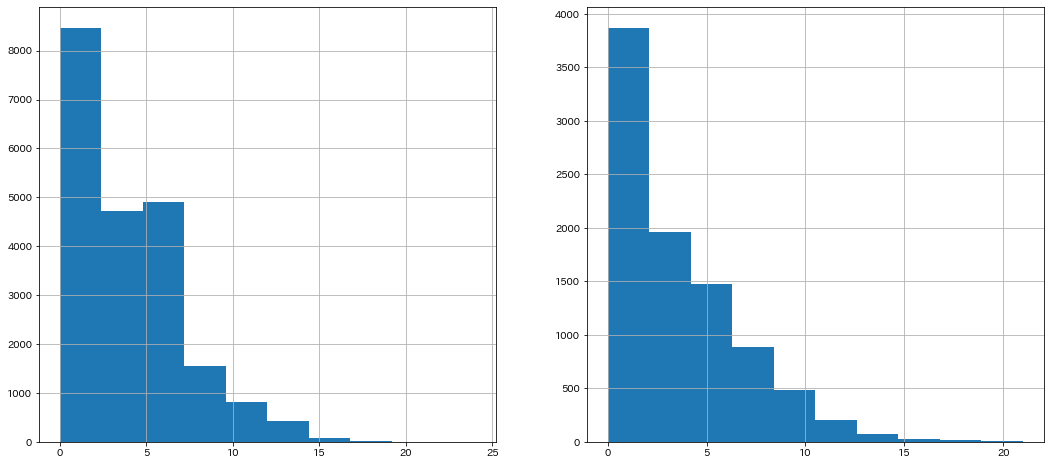

In [27]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
train['study_time'].hist()

plt.subplot(1, 2, 2)
test['study_time'].hist()

plt.show();

### commute

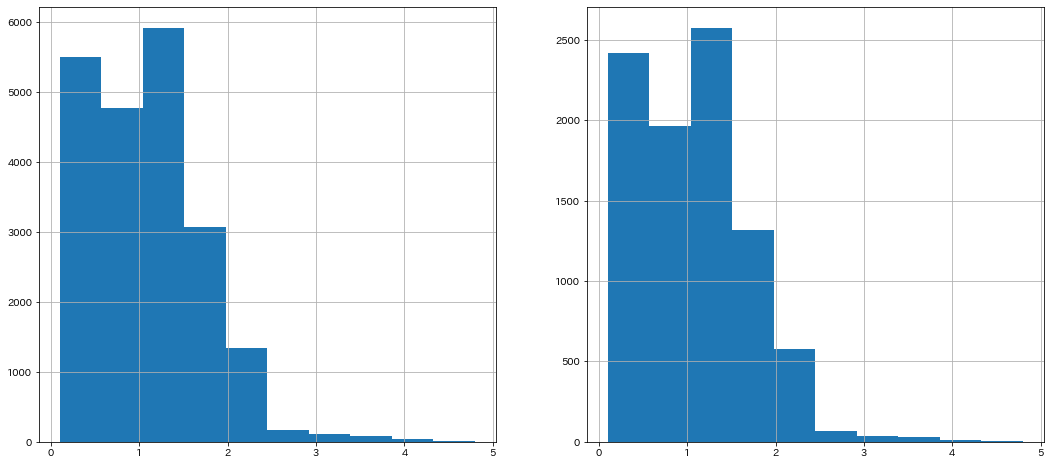

In [28]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
train['commute'].hist()

plt.subplot(1, 2, 2)
test['commute'].hist()

plt.show();

### overtime

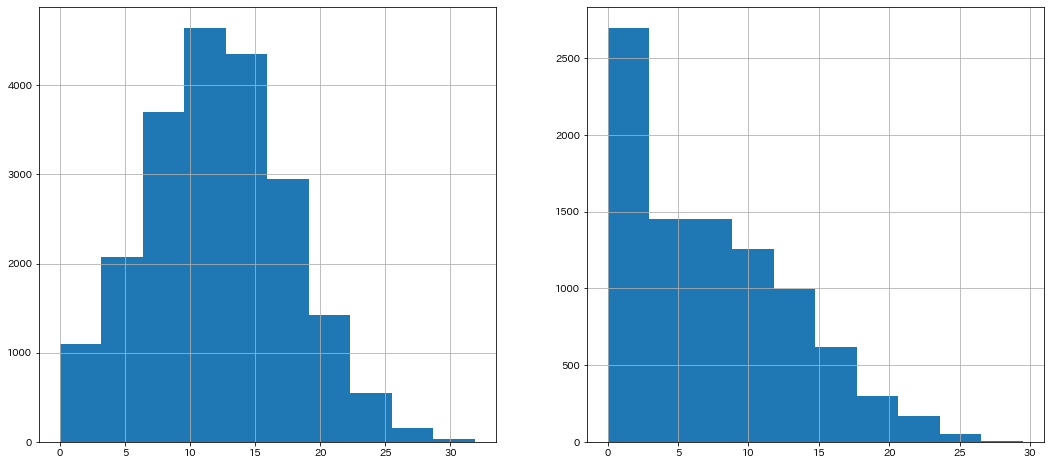

In [29]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
train['overtime'].hist()

plt.subplot(1, 2, 2)
test['overtime'].hist()

plt.show();

### salary

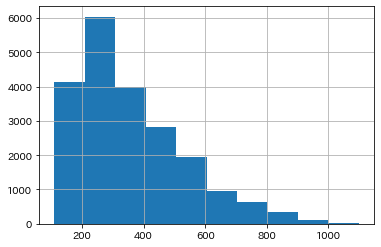

In [30]:
train['salary'].hist();

## 前処理

In [32]:
# Label Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train['area'] = le.fit_transform(train['area'])
test['area'] = le.transform(test['area'])

In [33]:
train.head()

,id,position,age,area,sex,partner,num_child,education,service_length,study_time,commute,overtime,salary
0,0,1,44,24,2,1,2,1,24,2.0,1.6,9.2,428.074887
1,1,2,31,10,1,0,0,0,13,9.0,0.7,12.4,317.930517
2,2,2,36,14,1,0,0,2,14,4.0,0.4,16.9,357.350316
3,3,0,22,26,2,0,0,0,4,3.0,0.4,6.1,201.310911
4,4,0,25,46,2,0,0,1,5,3.0,0.2,4.9,178.067475


## 学習

In [41]:
import lightgbm as lgb

In [42]:
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, 1:]

X_train.shape, y_train.shape, X_test.shape

((21000, 11), (21000,), (9000, 11))

In [45]:
model = lgb.LGBMRegressor(
    n_estimators=10000,
    learning_rate=0.0005,
    n_jobs=-1,
    random_state=0
)

In [46]:
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.0005, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=10000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [48]:
y_pred = model.predict(X_test)

## 提出ファイルの作成

In [50]:
submit_df = pd.DataFrame({'y': y_pred})
submit_df.index.name = 'id'
submit_df.to_csv('submission\submission.csv')

## 結果
- 27.85800